# Different Metrics for evaluating ML Model:
1. Accuracy: $$\frac{NumCorrectPred}{Total}$$
> * Nice with balanced class data (e.g. equal amount of Zeros and Ones for binomial category)
2. Recall: $$\frac{TruePositivesPred}{TotalPositiveActual}$$
> * Measures ability to find all relevant cases
3. Precision: $$\frac{TruePosPred}{TotalPosPred}$$
> * Measure of ability to identify ONLY relevant data points
4. F1: $$F_{1} = 2 * \frac{precision * recall}{precision + recall}$$
> * Harmonic mean of precision and recall such that a balance of the two can be viewed
> * Harmonic mean punishes extreme values
> > * e.g. Precision = 1, Recall = 0, Mean = 0.5, F1=0

# Confusion Matrix
<img src="Confusion_Matrix.png">

<img src="Confusion_Matrix_w_Metrics.png">

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
# No missing values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df)

5572

In [10]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

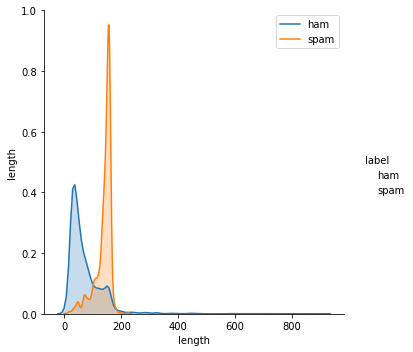

In [28]:
sns.pairplot(df[["length", "label"]], hue="label", size=5)
plt.legend(('ham','spam'))
plt.show()

/Users/mbair/anaconda3/envs/nlp_course/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/mbair/anaconda3/envs/nlp_course/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


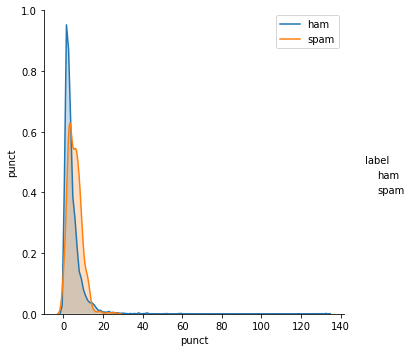

In [29]:
sns.pairplot(df[["punct", "label"]], hue="label", size=5)
plt.legend(('ham','spam'))
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# X is the feature data
X = df[['length', 'punct']]
# y is our label/target data
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(3900, 2)

In [46]:
X_test.shape

(1672, 2)

In [47]:
y_test.shape

(1672,)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr_mod = LogisticRegression(solver='lbfgs')

In [50]:
lr_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
prediction = lr_mod.predict(X_test)
lr_mod.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [56]:
# Accuracy
sum(lr_mod.predict(X_test) == y_test) / len(y_test)

0.8427033492822966

In [57]:
from sklearn import metrics

In [58]:
display(metrics.confusion_matrix(y_test,prediction))

array([[1404,   44],
       [ 219,    5]])

In [61]:
conf_df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction), 
                            index=['TrueHam','TrueSpam'], 
                            columns=['PredHam','PredSpam'])
conf_df

,PredHam,PredSpam
TrueHam,1404,44
TrueSpam,219,5


In [63]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [64]:
print(metrics.accuracy_score(y_test,prediction)) 

0.8427033492822966


In [67]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

prediction = nb_model.predict(X_test)

display(pd.DataFrame(metrics.confusion_matrix(y_test,prediction), 
                            index=['TrueHam','TrueSpam'], 
                            columns=['PredHam','PredSpam']))

print(metrics.classification_report(y_test,prediction))

,PredHam,PredSpam
TrueHam,1438,10
TrueSpam,224,0


              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [68]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

display(pd.DataFrame(metrics.confusion_matrix(y_test,prediction), 
                            index=['TrueHam','TrueSpam'], 
                            columns=['PredHam','PredSpam']))

print(metrics.classification_report(y_test,prediction))

,PredHam,PredSpam
TrueHam,1373,75
TrueSpam,121,103


              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

   micro avg       0.88      0.88      0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



# Feature Extraction from Text

### Count Vectorization

In [71]:
messages = ["Hey, lets go to the game today!",
            "Call your sister.",
            "Want to go walk your dogs?"]

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

vect.fit_transform(messages)
vect.get_feature_names()

['call',
 'dogs',
 'game',
 'go',
 'hey',
 'lets',
 'sister',
 'the',
 'to',
 'today',
 'walk',
 'want',
 'your']

### Term Frequency - Inverse Document Frequency
* Logarithmically scaled inverse fraction of the documents that contain the word
> Obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient

$$tf(t,d) =  \frac{NumTimesTermInDoc}{NumTermsInDoc}$$

$$idf(t,D)=log\left(\frac{NumDoc}{NumDocWithTerm}\right)$$

$$tfidf(t,d,D) = tf(t,d) \cdot idf(t,D) $$

In [77]:
import numpy as np
import pandas as pd

In [78]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [79]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [81]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [84]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [85]:
from sklearn.model_selection import train_test_split

In [87]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
count_vec = CountVectorizer()

In [94]:
# Steps:
# 1. Fit the vectorizer to the data (build the vocab, count the number of words)
count_vec.fit(X_train)
X_train_counts = count_vec.transform(X_train)
# 2. Transform the original text message to a vector
X_train_counts = count_vec.transform(X_train)

# OR Both at once:
X_train_counts = count_vec.fit_transform(X_train)

In [95]:
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [96]:
X_train.shape

(3733,)

In [97]:
X_train_counts.shape

(3733, 7082)

In [98]:
from sklearn.feature_extraction.text import TfidfTransformer

In [99]:
tfidf_trans = TfidfTransformer()

X_train_tfidf = tfidf_trans.fit_transform(X_train_counts)

In [101]:
X_train_tfidf.shape

(3733, 7082)

In [102]:
# We can also combine those steps:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)

In [103]:
X_train_tfidf.shape

(3733, 7082)

In [105]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

clf.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [106]:
# Utilizing pipeline to perform this task:
from sklearn.pipeline import Pipeline

In [109]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()
                     )
                    ])

In [110]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [111]:
predictions = text_clf.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [119]:
display(pd.DataFrame(metrics.confusion_matrix(y_test,predictions), 
                            index=['TrueHam','TrueSpam'], 
                            columns=['PredHam','PredSpam']))

print(metrics.classification_report(y_test,predictions))

print(metrics.accuracy_score(y_test, predictions))

,PredHam,PredSpam
TrueHam,1586,7
TrueSpam,12,234


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839

0.989668297988037


In [120]:
text_clf.predict(["Hi how are you doing today"])

array(['ham'], dtype=object)

In [133]:
text_clf.predict(["CONGRATULATIONS! You've been selected as a winner. TEXT WON to 44255 congratulations free entry to contest to contest"])

array(['spam'], dtype=object)

# Text Classification Project